# Problem Description
RMC, Inc., is a small firm that produces a variety of chemical products. In their production process, three materials are mixed together and heated to 300 degrees farenheight to produce two products: a fuel additive and a solvent base. Each ton of fuel additive is a mixture of 0.4 tons of material 1 and 0.6 tons of material 3. A ton of solvent base is a mixture of 0.5 tons of material 1, 0.2 tons of  material 2, and 0.3 tons of material 3. There are multiple markets for these products; however, the demand and pricing varies. 

After deducting relevant costs, the profit contribution in premium markets is 44 dollars for every ton of fuel additive produced and 38 dollars for every ton of solvent base produced. For discount markets the profit contributions drop to 15 dollars for every ton of fuel additive produced and 20 dollars for every ton of solvent base produced.

RMC has two mixing units available for production of fuel additive and solvent base. These mixers operate 6 hours a shift, three shifts a day, seven days a week. Both units can mix solvent base or fuel additive. The newer mixer 1 rate is faster than that of the older mixer 2 unit. 

While materials 1 and 2 are procured soley from vendors, material 3 is an itermediate product which can be manufactured on-site or procured from vendors. On-site manufacturing requires utilizing two flashing units to produce material 3, which is a stabilize version of material 4. The flashing units operate by heating material 4 and then flashing it under pressure to remove volatile compounds and stabilize the material.The volatile compounds are a byproduct, and RMC pays a small fee for a local power generation facility to incinerate this gas in accordance with local environmental regulations. The flashing units operate 6 hours a shift, three shifts a day, seven days a week.

The vendors supplying material 3 have limited availability  and offer significantly different pricing. 

The planning deparment it working to determine the production and inventory plans for the next four weeks.

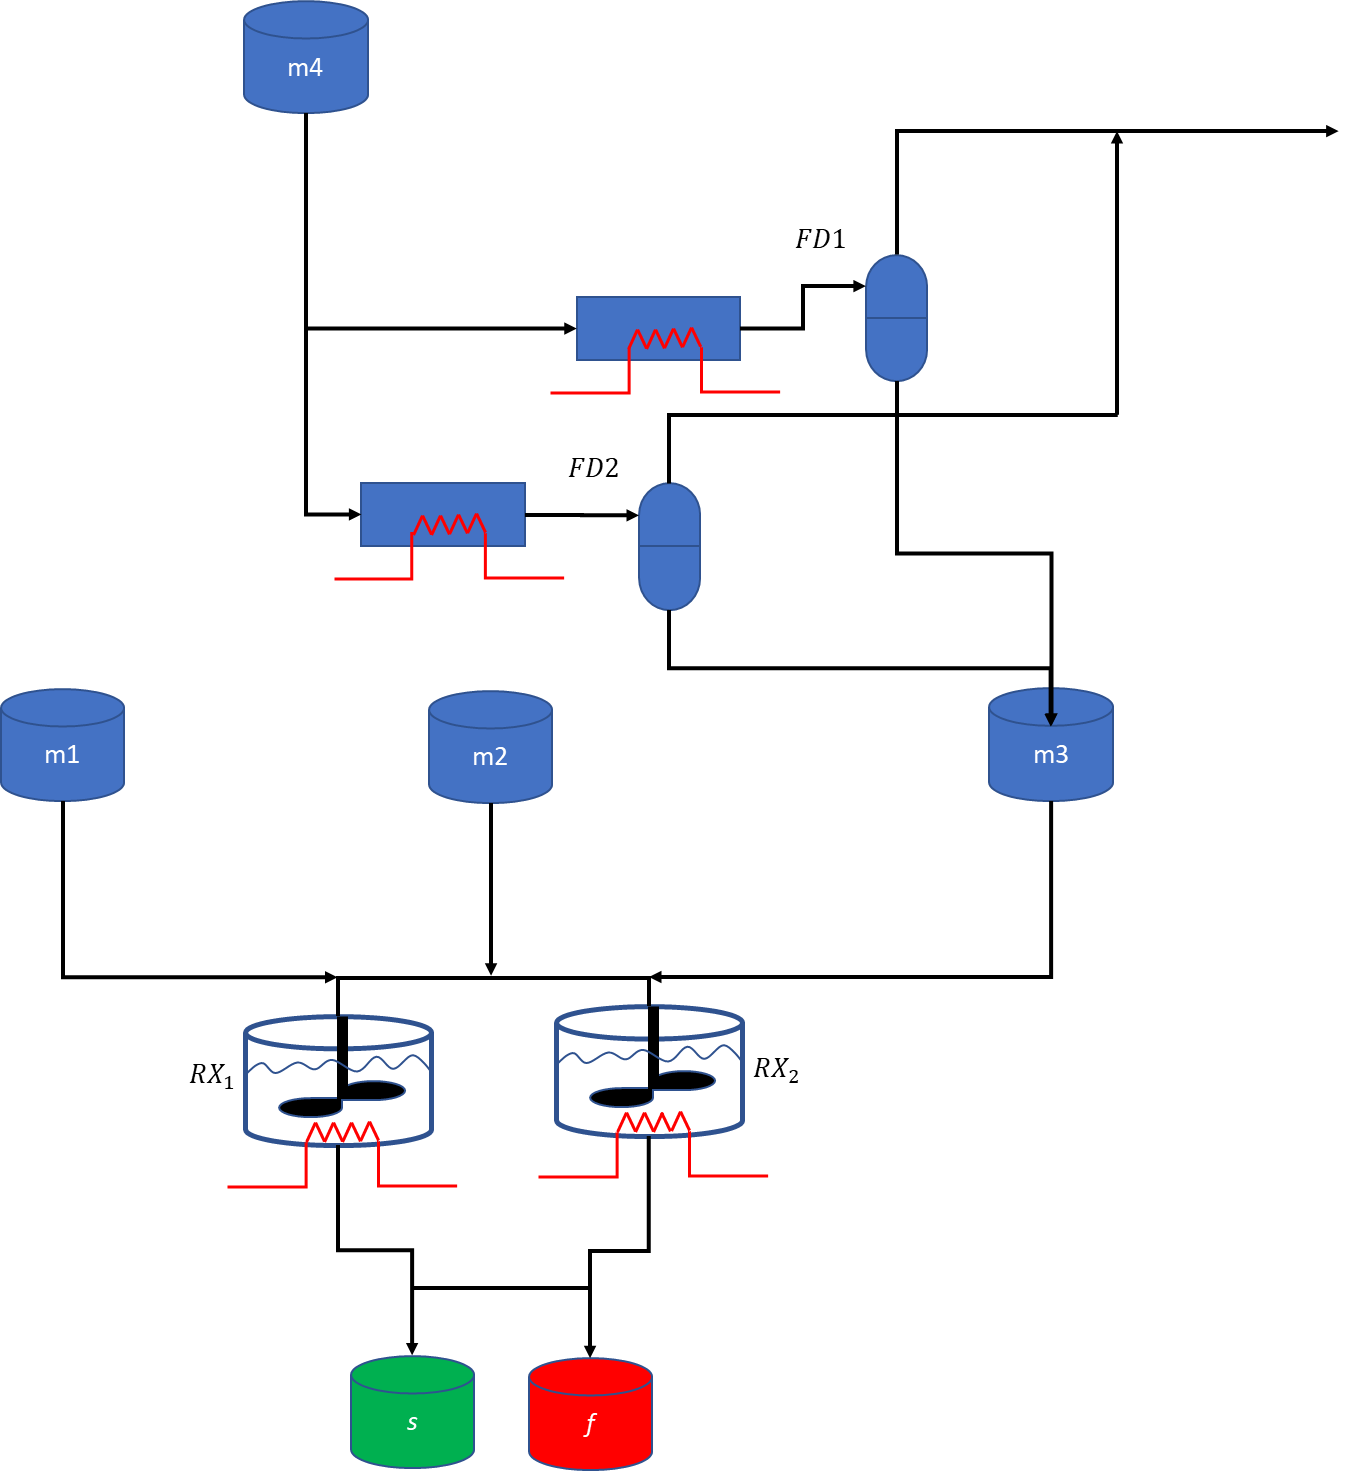

# Problem Definition
* Premium market sales yield 38 dollars per ton of solvent base and 44 dollars per ton of fuel additive. The demand for these products is 75 tons and 50 tons, respectively.
* Discount market sales yield 20 dollars per ton of solvent base and 15 dollars per ton of fuel additive. The demand for these products is 25 tons and 15 tons, respectively. 
* Product pricing and volumes is expected to remain constant for the upcoming 4 week period. 
* One ton of solvent base requires 0.5 tons of Material 1, 0.2 tons of Material 2, and 0.3 tons of Material 3. 
* One ton of fuel additive requires 0.4 tons of Material 1 and 0.6 tons of Material 3.
* Profits are maximized for four distinct periods. 
* On-hand material availability is 150 tons of Material 1, 100 tons of Material 2, 0 tons for material 3, and 150 tons of material 4.
* Material 3 can be produced at 0.2 tons/hr. 
* The yield loss for stabilizing material 4 is 0.1% by weight. 
* The mixer 1 production rates for solvent base and fuel additive are 0.80 tons/hour and 0.65 tons/hour, respectively.
* The mixer 2 production rates for solvent base and fuel additive are 0.75 tons/hour and 0.60 tons/hour, respectively.
* The total production time available for mixer 1, mixer 2, flashing unit 1, and flashing unit 2 is 126 hours each in all weeks, but in week four both flashing units are down for maintenance. 
* Additional material 1, material 2, material 3, and material 4 are available for purchase. Materials 1, 2, and 4  are single sourced. Pricing and volumes are constant over the four week period. Material 3 comes from two different suppliers (A and B); however, the material supplier B is unavailable due to planned maintenance in week four.

# Opportunity Statement
Maximize profit by determining how much of each product, solvent base and fuel additive, to produce within existing equipment capacity and with the raw materials available for each time period. Manage inventory around planned unit outages and supplier interruptions. 

# Model Development

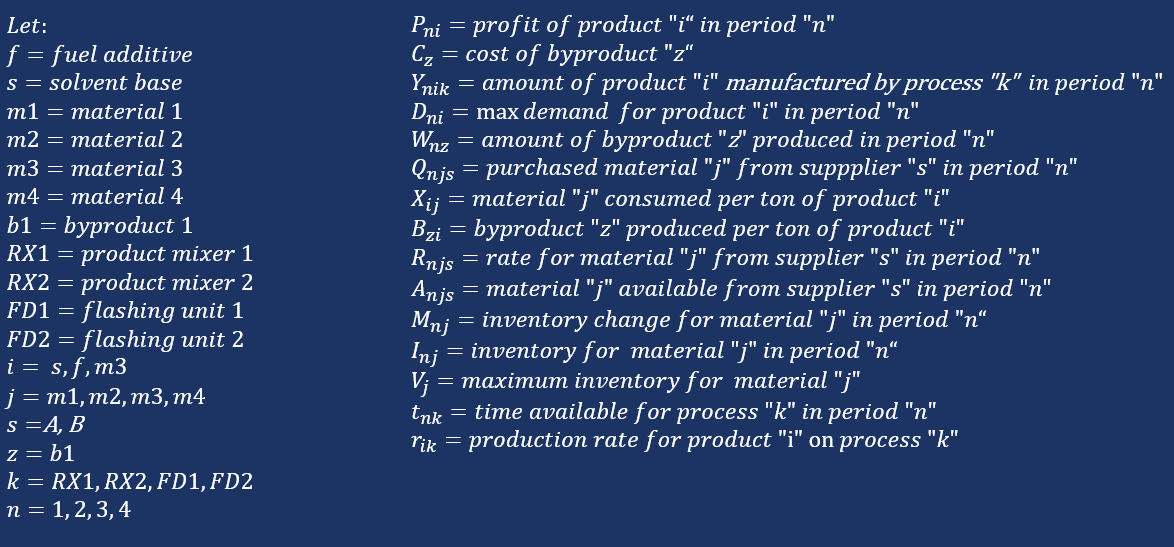

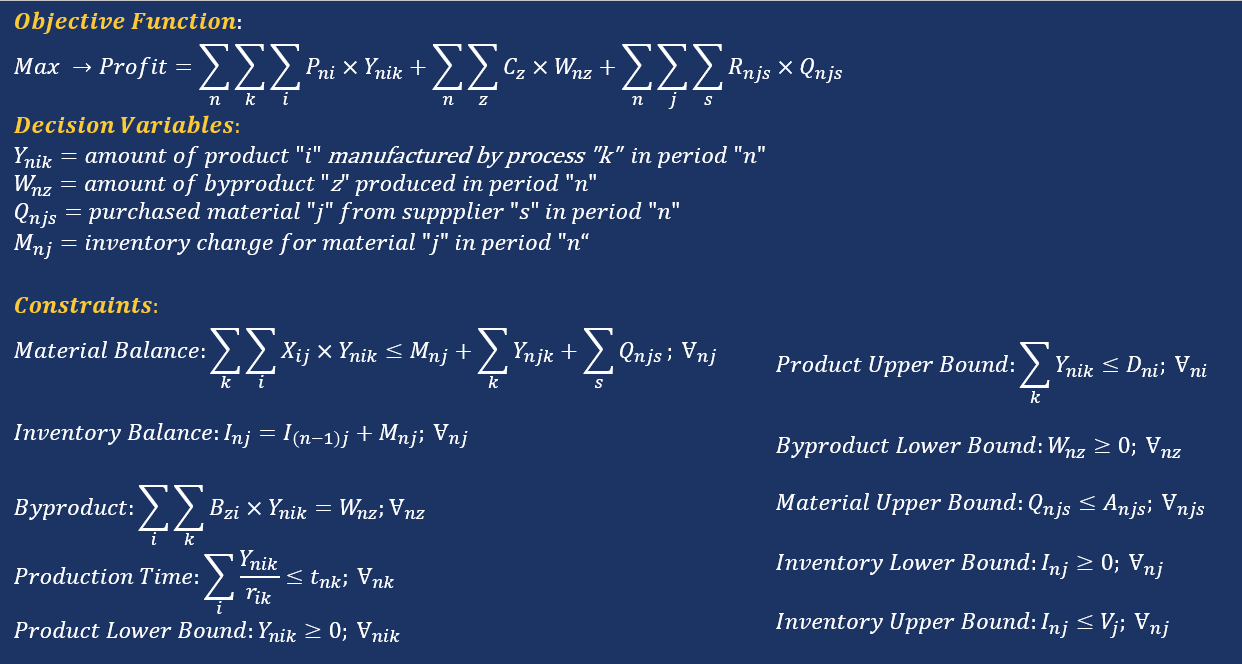

In [1]:
import pandas as pd
import numpy as np
import pulp

In [2]:
#read in data
dfProducts = pd.read_excel("3_4_Data.xlsx","Products")
dfByProducts = pd.read_excel("3_4_Data.xlsx","Byproducts")
dfMaterials= pd.read_excel("3_4_Data.xlsx","Materials")
dfRecipe= pd.read_excel("3_4_Data.xlsx","Recipe")
dfUnitRate= pd.read_excel("3_4_Data.xlsx","Unit_Rate")
dfUnitCapacity= pd.read_excel("3_4_Data.xlsx","Unit_Capacity")
dfPurchase= pd.read_excel("3_4_Data.xlsx","Purchase")

In [3]:
var_name=[dfProducts.loc[i,'Product']+'_'+dfProducts.loc[i,'Tier'].astype('int64').astype(str) \
          if pd.notna(dfProducts.loc[i,'Tier']) else dfProducts.loc[i,'Product']for i in dfProducts.index]
dfProducts['var']=var_name
dfProducts

,Product,Price,Min,Max,Tier,Period,var
0,f,44,0,50.0,1.0,1,f_1
1,f,15,0,15.0,2.0,1,f_2
2,f,44,0,50.0,1.0,2,f_1
3,f,15,0,15.0,2.0,2,f_2
4,f,44,0,50.0,1.0,3,f_1
5,f,15,0,15.0,2.0,3,f_2
6,f,44,0,50.0,1.0,4,f_1
7,f,15,0,15.0,2.0,4,f_2
8,s,38,0,75.0,1.0,1,s_1
9,s,20,0,25.0,2.0,1,s_2


In [4]:
dfMaterials

,Material,Available,MinInv,MaxInv
0,m1,150,0,200
1,m2,100,0,200
2,m3,0,0,200
3,m4,150,0,200


In [5]:
dfYield=dfRecipe[dfRecipe['Cons']<0]
dfYield=dfYield.merge(right=dfProducts, how='left',left_on='Product',right_on='Product')
dfYield['Product']=dfYield['var']
dfYield=dfYield[['Product','Material','Period','Cons']]
dfYield

,Product,Material,Period,Cons
0,m3,b1,1,-0.001
1,m3,b1,2,-0.001
2,m3,b1,3,-0.001
3,m3,b1,4,-0.001


In [6]:
dfRecipe=dfRecipe[dfRecipe['Cons']>=0]
dfRecipe=dfRecipe.merge(right=dfProducts, how='left',left_on='Product',right_on='Product')
dfRecipe['Product']=dfRecipe['var']
dfRecipe=dfRecipe[['Product','Material','Cons']]
dfRecipe.drop_duplicates(inplace=True)
dfRecipe.sort_values(by='Product', ascending=False, inplace=True)
dfRecipe

,Product,Material,Cons
9,s_2,m2,0.200
17,s_2,m3,0.300
25,s_2,m4,0.000
1,s_2,m1,0.500
0,s_1,m1,0.500
8,s_1,m2,0.200
16,s_1,m3,0.300
24,s_1,m4,0.000
64,m3,m1,0.000
72,m3,m3,0.000


In [7]:
dfUnitRate=dfUnitRate.merge(right=dfProducts, how='left',left_on='Product',right_on='Product')
dfUnitRate['Product']=dfUnitRate['var']
dfUnitRate=dfUnitRate[['Unit','Product','Period','Rate']]
dfUnitRate.sort_values(by='Product', ascending=False, inplace=True)
dfUnitRate

,Unit,Product,Period,Rate
23,RX2,s_2,4,0.75
3,RX1,s_2,2,0.80
5,RX1,s_2,3,0.80
21,RX2,s_2,3,0.75
7,RX1,s_2,4,0.80
1,RX1,s_2,1,0.80
19,RX2,s_2,2,0.75
17,RX2,s_2,1,0.75
0,RX1,s_1,1,0.80
16,RX2,s_1,1,0.75


In [8]:
dfUnitCapacity

,Unit,Time,Period
0,RX1,126,1
1,RX2,126,1
2,FD1,126,1
3,FD2,126,1
4,RX1,126,2
5,RX2,126,2
6,FD1,126,2
7,FD2,126,2
8,RX1,126,3
9,RX2,126,3


In [9]:
dfPurchase

,Material,Supplier,Max,Price,Period
0,m1,A,15,1,1
1,m2,A,10,3,1
2,m3,A,8,2,1
3,m3,B,50,5,1
4,m4,A,20,1,1
5,m1,A,15,1,2
6,m2,A,10,3,2
7,m3,A,8,2,2
8,m3,B,50,5,2
9,m4,A,20,1,2


In [10]:
#define input parameter values
products=list(dfProducts['var'].unique())
byproducts=list(dfYield['Material'].unique())
materials=list(dfMaterials['Material'].unique())
units=list(dfUnitCapacity['Unit'].unique())
periods=list(dfProducts['Period'].unique())

X={}
for p in products:
    X[p]=dict(zip(materials,[0]*len(materials)))
for i in dfRecipe.index:
    X[dfRecipe.loc[i,'Product']][dfRecipe.loc[i,'Material']]=dfRecipe.loc[i,'Cons']

Io=dict(zip(materials,[0]*len(materials)))
for i in dfMaterials.index:
    Io[dfMaterials.loc[i,'Material']]=dfMaterials.loc[i,'Available']

V=dict(zip(materials,[0]*len(materials)))
for i in dfMaterials.index:
    V[dfMaterials.loc[i,'Material']]=dfMaterials.loc[i,'MaxInv']
    
P={}
for n in periods:
    P[n]=dict(zip(products,[0]*len(products)))
for i in dfProducts.index:
    P[dfProducts.loc[i,'Period']][dfProducts.loc[i,'var']]=dfProducts.loc[i,'Price']

D={}
for n in periods:
    D[n]=dict(zip(products,[0]*len(products)))
for i in dfProducts.index:
    D[dfProducts.loc[i,'Period']][dfProducts.loc[i,'var']]=dfProducts.loc[i,'Max']    

r={}
for p in products:
    rates=dfUnitRate['Product'][dfUnitRate['Unit']==p].tolist()
    r[p]=dict(zip(rates,[0]*len(rates)))
for i in dfUnitRate.index:
    r[dfUnitRate.loc[i,'Product']][dfUnitRate.loc[i,'Unit']]=dfUnitRate.loc[i,'Rate']

t={}
for n in periods:
    t[n]=dict(zip(units,[0]*len(units)))
for i in dfUnitCapacity.index:
    t[dfUnitCapacity.loc[i,'Period']][dfUnitCapacity.loc[i,'Unit']]=dfUnitCapacity.loc[i,'Time']
    
B={}
for b in byproducts:
    sources=dfYield['Product'][dfYield['Material']==b].tolist()
    B[b]=dict(zip(sources,[0]*len(sources)))
for i in dfYield.index:
    B[dfYield.loc[i,'Material']][dfYield.loc[i,'Product']]=-dfYield.loc[i,'Cons']

C=dict(zip(byproducts,[0]*len(byproducts)))
for i in dfByProducts.index:
    C[dfByProducts.loc[i,'ByProduct']]=dfByProducts.loc[i,'Cost']
    
R={}
for n in periods:
    R[n]=dict(zip(materials,[0]*len(materials)))
for n in periods:
    for m in materials:
        suppliers=dfPurchase['Supplier'][(dfPurchase['Material']==m) & (dfPurchase['Period']==n)].tolist()
        R[n][m]=dict(zip(suppliers,[0]*len(suppliers)))
for i in dfPurchase.index:
    R[dfPurchase.loc[i,'Period']][dfPurchase.loc[i,'Material']][dfPurchase.loc[i,'Supplier']]=dfPurchase.loc[i,'Price']
    
A={}
for n in periods:
    A[n]=dict(zip(materials,[0]*len(materials)))
for n in periods:
    for m in materials:
        suppliers=dfPurchase['Supplier'][(dfPurchase['Material']==m) & (dfPurchase['Period']==n)].tolist()
        A[n][m]=dict(zip(suppliers,[0]*len(suppliers)))
for i in dfPurchase.index:
    A[dfPurchase.loc[i,'Period']][dfPurchase.loc[i,'Material']][dfPurchase.loc[i,'Supplier']]=dfPurchase.loc[i,'Max']

In [11]:
X

{'f_1': {'m1': 0.4, 'm2': 0.0, 'm3': 0.6, 'm4': 0.0},
 'f_2': {'m1': 0.4, 'm2': 0.0, 'm3': 0.6, 'm4': 0.0},
 's_1': {'m1': 0.5, 'm2': 0.2, 'm3': 0.3, 'm4': 0.0},
 's_2': {'m1': 0.5, 'm2': 0.2, 'm3': 0.3, 'm4': 0.0},
 'm3': {'m1': 0.0, 'm2': 0.0, 'm3': 0.0, 'm4': 0.999}}

In [12]:
Io

{'m1': 150, 'm2': 100, 'm3': 0, 'm4': 150}

In [13]:
V

{'m1': 200, 'm2': 200, 'm3': 200, 'm4': 200}

In [14]:
P

{1: {'f_1': 44, 'f_2': 15, 's_1': 38, 's_2': 20, 'm3': 0},
 2: {'f_1': 44, 'f_2': 15, 's_1': 38, 's_2': 20, 'm3': 0},
 3: {'f_1': 44, 'f_2': 15, 's_1': 38, 's_2': 20, 'm3': 0},
 4: {'f_1': 44, 'f_2': 15, 's_1': 38, 's_2': 20, 'm3': 0}}

In [15]:
D

{1: {'f_1': 50.0, 'f_2': 15.0, 's_1': 75.0, 's_2': 25.0, 'm3': nan},
 2: {'f_1': 50.0, 'f_2': 15.0, 's_1': 75.0, 's_2': 25.0, 'm3': nan},
 3: {'f_1': 50.0, 'f_2': 15.0, 's_1': 75.0, 's_2': 25.0, 'm3': nan},
 4: {'f_1': 50.0, 'f_2': 15.0, 's_1': 75.0, 's_2': 25.0, 'm3': nan}}

In [16]:
r

{'f_1': {'RX2': 0.6, 'RX1': 0.65},
 'f_2': {'RX2': 0.6, 'RX1': 0.65},
 's_1': {'RX1': 0.8, 'RX2': 0.75},
 's_2': {'RX2': 0.75, 'RX1': 0.8},
 'm3': {'FD2': 0.2, 'FD1': 0.2}}

In [17]:
t

{1: {'RX1': 126, 'RX2': 126, 'FD1': 126, 'FD2': 126},
 2: {'RX1': 126, 'RX2': 126, 'FD1': 126, 'FD2': 126},
 3: {'RX1': 126, 'RX2': 126, 'FD1': 126, 'FD2': 126},
 4: {'RX1': 126, 'RX2': 126, 'FD1': 0, 'FD2': 0}}

In [18]:
B

{'b1': {'m3': 0.001}}

In [19]:
C

{'b1': -0.01}

In [20]:
R

{1: {'m1': {'A': 1}, 'm2': {'A': 3}, 'm3': {'A': 2, 'B': 5}, 'm4': {'A': 1}},
 2: {'m1': {'A': 1}, 'm2': {'A': 3}, 'm3': {'A': 2, 'B': 5}, 'm4': {'A': 1}},
 3: {'m1': {'A': 1}, 'm2': {'A': 3}, 'm3': {'A': 2, 'B': 5}, 'm4': {'A': 1}},
 4: {'m1': {'A': 1}, 'm2': {'A': 3}, 'm3': {'A': 2, 'B': 5}, 'm4': {'A': 1}}}

In [21]:
A

{1: {'m1': {'A': 15},
  'm2': {'A': 10},
  'm3': {'A': 8, 'B': 50},
  'm4': {'A': 20}},
 2: {'m1': {'A': 15},
  'm2': {'A': 10},
  'm3': {'A': 8, 'B': 50},
  'm4': {'A': 20}},
 3: {'m1': {'A': 15},
  'm2': {'A': 10},
  'm3': {'A': 8, 'B': 50},
  'm4': {'A': 20}},
 4: {'m1': {'A': 15},
  'm2': {'A': 10},
  'm3': {'A': 8, 'B': 0},
  'm4': {'A': 20}}}

## Build & Solve Model

In [22]:
#Step 1: Create Model Object
model = pulp.LpProblem("Production_Resourcing", pulp.LpMaximize)

In [23]:
#Step 2: Create Decision Variables
prd_index=[]
for i in dfUnitRate.index:
        prd_index.append((dfUnitRate.loc[i,'Period'],dfUnitRate.loc[i,'Product'],dfUnitRate.loc[i,'Unit']))

byprd_index=[]
for i in dfYield.index:
        byprd_index.append((dfYield.loc[i,'Period'],dfYield.loc[i,'Material']))

raw_index=[]
for i in dfPurchase.index:
        raw_index.append((dfPurchase.loc[i,'Period'],dfPurchase.loc[i,'Material'],dfPurchase.loc[i,'Supplier']))
        
mat_index=[]
for n in periods:
        [mat_index.append((n,m)) for m in materials]    

Y = pulp.LpVariable.dicts('Y', ((period,products,equip) for period, products, equip in prd_index), lowBound=0, cat='Continuous')
W = pulp.LpVariable.dicts('W', ((period, byproducts) for period, byproducts in byprd_index), lowBound=0, cat='Continuous')
Q = pulp.LpVariable.dicts('Q', ((period,material,supplier) for period, material,supplier in raw_index), lowBound=0, cat='Continuous')
for i in Q.items():
    i[1].upBound=A[i[0][0]][i[0][1]][i[0][2]]
M = pulp.LpVariable.dicts('M', ((period, materials) for period, materials in mat_index), lowBound=None, cat='Continuous')
I = pulp.LpVariable.dicts('I', ((period, materials) for period, materials in mat_index), lowBound=0, cat='Continuous')
for i in I.items():
    i[1].upBound=V[i[0][1]]
Y

{(4, 's_2', 'RX2'): Y_(4,_'s_2',_'RX2'),
 (2, 's_2', 'RX1'): Y_(2,_'s_2',_'RX1'),
 (3, 's_2', 'RX1'): Y_(3,_'s_2',_'RX1'),
 (3, 's_2', 'RX2'): Y_(3,_'s_2',_'RX2'),
 (4, 's_2', 'RX1'): Y_(4,_'s_2',_'RX1'),
 (1, 's_2', 'RX1'): Y_(1,_'s_2',_'RX1'),
 (2, 's_2', 'RX2'): Y_(2,_'s_2',_'RX2'),
 (1, 's_2', 'RX2'): Y_(1,_'s_2',_'RX2'),
 (1, 's_1', 'RX1'): Y_(1,_'s_1',_'RX1'),
 (1, 's_1', 'RX2'): Y_(1,_'s_1',_'RX2'),
 (4, 's_1', 'RX2'): Y_(4,_'s_1',_'RX2'),
 (2, 's_1', 'RX2'): Y_(2,_'s_1',_'RX2'),
 (3, 's_1', 'RX2'): Y_(3,_'s_1',_'RX2'),
 (4, 's_1', 'RX1'): Y_(4,_'s_1',_'RX1'),
 (3, 's_1', 'RX1'): Y_(3,_'s_1',_'RX1'),
 (2, 's_1', 'RX1'): Y_(2,_'s_1',_'RX1'),
 (4, 'm3', 'FD2'): Y_(4,_'m3',_'FD2'),
 (3, 'm3', 'FD2'): Y_(3,_'m3',_'FD2'),
 (2, 'm3', 'FD2'): Y_(2,_'m3',_'FD2'),
 (1, 'm3', 'FD2'): Y_(1,_'m3',_'FD2'),
 (4, 'm3', 'FD1'): Y_(4,_'m3',_'FD1'),
 (3, 'm3', 'FD1'): Y_(3,_'m3',_'FD1'),
 (2, 'm3', 'FD1'): Y_(2,_'m3',_'FD1'),
 (1, 'm3', 'FD1'): Y_(1,_'m3',_'FD1'),
 (2, 'f_2', 'RX2'): Y_(2,_'f_2',

In [24]:
W

{(1, 'b1'): W_(1,_'b1'),
 (2, 'b1'): W_(2,_'b1'),
 (3, 'b1'): W_(3,_'b1'),
 (4, 'b1'): W_(4,_'b1')}

In [25]:
Q

{(1, 'm1', 'A'): Q_(1,_'m1',_'A'),
 (1, 'm2', 'A'): Q_(1,_'m2',_'A'),
 (1, 'm3', 'A'): Q_(1,_'m3',_'A'),
 (1, 'm3', 'B'): Q_(1,_'m3',_'B'),
 (1, 'm4', 'A'): Q_(1,_'m4',_'A'),
 (2, 'm1', 'A'): Q_(2,_'m1',_'A'),
 (2, 'm2', 'A'): Q_(2,_'m2',_'A'),
 (2, 'm3', 'A'): Q_(2,_'m3',_'A'),
 (2, 'm3', 'B'): Q_(2,_'m3',_'B'),
 (2, 'm4', 'A'): Q_(2,_'m4',_'A'),
 (3, 'm1', 'A'): Q_(3,_'m1',_'A'),
 (3, 'm2', 'A'): Q_(3,_'m2',_'A'),
 (3, 'm3', 'A'): Q_(3,_'m3',_'A'),
 (3, 'm3', 'B'): Q_(3,_'m3',_'B'),
 (3, 'm4', 'A'): Q_(3,_'m4',_'A'),
 (4, 'm1', 'A'): Q_(4,_'m1',_'A'),
 (4, 'm2', 'A'): Q_(4,_'m2',_'A'),
 (4, 'm3', 'A'): Q_(4,_'m3',_'A'),
 (4, 'm3', 'B'): Q_(4,_'m3',_'B'),
 (4, 'm4', 'A'): Q_(4,_'m4',_'A')}

In [26]:
M

{(1, 'm1'): M_(1,_'m1'),
 (1, 'm2'): M_(1,_'m2'),
 (1, 'm3'): M_(1,_'m3'),
 (1, 'm4'): M_(1,_'m4'),
 (2, 'm1'): M_(2,_'m1'),
 (2, 'm2'): M_(2,_'m2'),
 (2, 'm3'): M_(2,_'m3'),
 (2, 'm4'): M_(2,_'m4'),
 (3, 'm1'): M_(3,_'m1'),
 (3, 'm2'): M_(3,_'m2'),
 (3, 'm3'): M_(3,_'m3'),
 (3, 'm4'): M_(3,_'m4'),
 (4, 'm1'): M_(4,_'m1'),
 (4, 'm2'): M_(4,_'m2'),
 (4, 'm3'): M_(4,_'m3'),
 (4, 'm4'): M_(4,_'m4')}

In [27]:
I

{(1, 'm1'): I_(1,_'m1'),
 (1, 'm2'): I_(1,_'m2'),
 (1, 'm3'): I_(1,_'m3'),
 (1, 'm4'): I_(1,_'m4'),
 (2, 'm1'): I_(2,_'m1'),
 (2, 'm2'): I_(2,_'m2'),
 (2, 'm3'): I_(2,_'m3'),
 (2, 'm4'): I_(2,_'m4'),
 (3, 'm1'): I_(3,_'m1'),
 (3, 'm2'): I_(3,_'m2'),
 (3, 'm3'): I_(3,_'m3'),
 (3, 'm4'): I_(3,_'m4'),
 (4, 'm1'): I_(4,_'m1'),
 (4, 'm2'): I_(4,_'m2'),
 (4, 'm3'): I_(4,_'m3'),
 (4, 'm4'): I_(4,_'m4')}

In [29]:
#create a data frame for storing decisions varialbles that will enable better reporting/aggregation
varClasses=[Y,W,Q,M,I]
varNames=['Y','W','Q','M','I']
varCase={'Y':'npk','W':'nb','Q':'nms','M':'nm','I':'nm'}

df_var=pd.DataFrame(columns=['period','product','equip','byprd','material','supplier','name','type'])

j=0

for i in varClasses:
    if varCase[varNames[j]]=='npk':
        ini_list=list(i.keys())
        df_dict={}
        
        tPeriod=[k[0] for k in ini_list]
        tPeriod={'period':tPeriod}
        df_dict.update(tPeriod)
              
        tProduct=[k[1] for k in ini_list]
        tProduct={'product': tProduct}
        df_dict.update(tProduct)
        
        tEquip=[k[2] for k in ini_list]
        tEquip={'equip':tEquip}
        df_dict.update(tEquip)
        
        tName=list(i.values())
        tName=[k.name for k in tName]
        tName={'name': tName}
        df_dict.update(tName)

        tType=varNames[j]
        tType={'type': tType}
        df_dict.update(tType)

        df_var=df_var.append(pd.DataFrame(df_dict))

    elif varCase[varNames[j]]=='nb':
        ini_list=list(i.keys())
        df_dict={}

        tPeriod=[k[0] for k in ini_list]
        tPeriod={'period':tPeriod}
        df_dict.update(tPeriod)

        tByprd=[k[1] for k in ini_list]
        tByprd={'byprd':tByprd}
        df_dict.update(tByprd)

        tName=list(i.values())
        tName=[i.name for i in tName]
        tName={'name': tName}
        df_dict.update(tName)

        tType=varNames[j]
        tType={'type': tType}
        df_dict.update(tType)

        df_var=df_var.append(pd.DataFrame(df_dict))    
    
    elif varCase[varNames[j]]=='nms':
        varCase[varNames[j]]
        ini_list=list(i.keys())
        df_dict={}
        
        tPeriod=[k[0] for k in ini_list]
        tPeriod={'period':tPeriod}
        df_dict.update(tPeriod)
              
        tMat=[k[1] for k in ini_list]
        tMat={'material': tMat}
        df_dict.update(tMat)
        
        tSup=[k[2] for k in ini_list]
        tSup={'supplier':tSup}
        df_dict.update(tSup)
        
        tName=list(i.values())
        tName=[k.name for k in tName]
        tName={'name': tName}
        df_dict.update(tName)

        tType=varNames[j]
        tType={'type': tType}
        df_dict.update(tType)

        df_var=df_var.append(pd.DataFrame(df_dict))
    else:
        ini_list=list(i.keys())
        df_dict={}

        tPeriod=[k[0] for k in ini_list]
        tPeriod={'period':tPeriod}
        df_dict.update(tPeriod)

        tMat=[k[1] for k in ini_list]
        tMat={'material': tMat}
        df_dict.update(tMat)

        tName=list(i.values())
        tName=[i.name for i in tName]
        tName={'name': tName}
        df_dict.update(tName)

        tType=varNames[j]
        tType={'type': tType}
        df_dict.update(tType)  

        df_var=df_var.append(pd.DataFrame(df_dict))

    j+=1

df_var['name']=df_var['name'].astype(str)
df_var

,period,product,equip,byprd,material,supplier,name,type
0,4,s_2,RX2,NaN,NaN,NaN,"Y_(4,_'s_2',_'RX2')",Y
1,2,s_2,RX1,NaN,NaN,NaN,"Y_(2,_'s_2',_'RX1')",Y
2,3,s_2,RX1,NaN,NaN,NaN,"Y_(3,_'s_2',_'RX1')",Y
3,3,s_2,RX2,NaN,NaN,NaN,"Y_(3,_'s_2',_'RX2')",Y
4,4,s_2,RX1,NaN,NaN,NaN,"Y_(4,_'s_2',_'RX1')",Y
...,...,...,...,...,...,...,...,...
11,3,NaN,NaN,NaN,m4,NaN,"I_(3,_'m4')",I
12,4,NaN,NaN,NaN,m1,NaN,"I_(4,_'m1')",I
13,4,NaN,NaN,NaN,m2,NaN,"I_(4,_'m2')",I
14,4,NaN,NaN,NaN,m3,NaN,"I_(4,_'m3')",I


In [30]:
# Step 3: Add Objective Function
obj_fxn = 0
obj_fxn += pulp.lpSum([Y[n,p,k]*P[n][p] for n,p,k in prd_index])
obj_fxn += pulp.lpSum([W[n,b]*C[b] for n,b in byprd_index])
obj_fxn += pulp.lpSum([Q[n,m,s]*-R[n][m][s] for n,m,s in raw_index])
model += obj_fxn

In [31]:
#Step 4: Add Constraints

#material balance
for n in periods:
    prd_index=[]
    dfPrd=dfUnitRate[dfUnitRate['Period']==2]
    for i in dfPrd.index:
        prd_index.append((dfPrd.loc[i,'Product'],dfPrd.loc[i,'Unit']))
    for m in materials:
        model += sum([X[p][m]*Y[n,p,k] for p, k in prd_index]) <= \
        M[n,m] + (sum([Y[n,m,k] for k in r[m].keys()]) if m in r.keys() else 0) + sum([Q[n,m,s] for s in R[n][m].keys()]) , 'Material Balance'+'_'+str(n)+'_'+str(m)

#Inventory balance
for m in materials:
    model += I[1,m] == Io[m] - M[1,m] , 'Inventory Balance'+'_'+str(1)+'_'+str(m)

for n in periods[1:]:
    for m in materials:
        model += I[n,m] == I[n-1,m] - M[n,m] , 'Inventory Balance'+'_'+str(n)+'_'+str(m)
        
#production time balance
for n in periods:
    for k in units:
        unit_prd=dfUnitRate['Product'][(dfUnitRate['Unit']==k) & (dfUnitRate['Period']==n)]
        model += sum([Y[n,p,k]*(1/r[p][k]) for p in unit_prd]) <= t[n][k], 'Production Time'+'_'+str(n)+'_'+str(k)

#byproduct balance
for n in periods:
    for b in byproducts:
        byprd_index=[]
        for i in dfUnitRate[dfUnitRate['Product'].isin(list(B[b].keys()))].index:
                byprd_index.append((dfUnitRate.loc[i,'Product'],dfUnitRate.loc[i,'Unit']))
        model += sum([B[b][p]*Y[n,p,k] for p,k in byprd_index]) == W[n,b], 'Byproduct'+'_'+str(n)+'_'+str(b)

#product upper bound
for n in periods:    
    for p in dfProducts['var'][(pd.notna(dfProducts['Max'])) & (dfProducts['Period']==n)].tolist():
        model += sum(Y[n,p,k] for k in r[p].keys()) <= D[n][p], 'Max Product'+'_'+str(n)+'_'+str(p)
    
    
#NOTE we did note at the non-negative constraints here because we already specificied them in the "lowBound" of the LpVariable class. 
#Material purchase and inventory maximums set as upper bound at variable declaration

In [32]:
#Step 5: Write the Model
model.writeLP("lp_model.lp")

[I_(1,_'m1'),
 I_(1,_'m2'),
 I_(1,_'m3'),
 I_(1,_'m4'),
 I_(2,_'m1'),
 I_(2,_'m2'),
 I_(2,_'m3'),
 I_(2,_'m4'),
 I_(3,_'m1'),
 I_(3,_'m2'),
 I_(3,_'m3'),
 I_(3,_'m4'),
 I_(4,_'m1'),
 I_(4,_'m2'),
 I_(4,_'m3'),
 I_(4,_'m4'),
 M_(1,_'m1'),
 M_(1,_'m2'),
 M_(1,_'m3'),
 M_(1,_'m4'),
 M_(2,_'m1'),
 M_(2,_'m2'),
 M_(2,_'m3'),
 M_(2,_'m4'),
 M_(3,_'m1'),
 M_(3,_'m2'),
 M_(3,_'m3'),
 M_(3,_'m4'),
 M_(4,_'m1'),
 M_(4,_'m2'),
 M_(4,_'m3'),
 M_(4,_'m4'),
 Q_(1,_'m1',_'A'),
 Q_(1,_'m2',_'A'),
 Q_(1,_'m3',_'A'),
 Q_(1,_'m3',_'B'),
 Q_(1,_'m4',_'A'),
 Q_(2,_'m1',_'A'),
 Q_(2,_'m2',_'A'),
 Q_(2,_'m3',_'A'),
 Q_(2,_'m3',_'B'),
 Q_(2,_'m4',_'A'),
 Q_(3,_'m1',_'A'),
 Q_(3,_'m2',_'A'),
 Q_(3,_'m3',_'A'),
 Q_(3,_'m3',_'B'),
 Q_(3,_'m4',_'A'),
 Q_(4,_'m1',_'A'),
 Q_(4,_'m2',_'A'),
 Q_(4,_'m3',_'A'),
 Q_(4,_'m3',_'B'),
 Q_(4,_'m4',_'A'),
 W_(1,_'b1'),
 W_(2,_'b1'),
 W_(3,_'b1'),
 W_(4,_'b1'),
 Y_(1,_'f_1',_'RX1'),
 Y_(1,_'f_1',_'RX2'),
 Y_(1,_'f_2',_'RX1'),
 Y_(1,_'f_2',_'RX2'),
 Y_(1,_'m3',_'FD1'),
 Y_(1,_

In [33]:
#Step 6: Solve Model
model.solve(pulp.PULP_CBC_CMD(msg=True, keepFiles=False))
pulp.LpStatus[model.status]

'Optimal'

## Evaluation & Sensitivity Analysis

In [34]:
# look at objective value
model.objective.value()

18480.945152000004

In [35]:
#create data frame for df_var
df_var_rslt=pd.DataFrame()
lp_class=[]
var=[]
val=[]
rc=[]
for j in model.variables():
    lp_class.append('var')
    var.append(j)
    val.append(j.varValue)
    rc.append(j.dj)

df_var_rslt['class']=lp_class
df_var_rslt['name']=var
df_var_rslt['name']=df_var_rslt['name'].astype(str)
df_var_rslt['val']=np.round(val,2)
df_var_rslt['rc']=np.round(rc,2)
df_var_rslt['rc']=df_var_rslt['rc'].round(2)

df_var_rslt=df_var.merge(df_var_rslt, how='inner',left_on='name', right_on='name')
df_var_rslt.to_excel("variables.xlsx",sheet_name='variables', index=False)
df_var_rslt

,period,product,equip,byprd,material,supplier,name,type,class,val,rc
0,4,s_2,RX2,NaN,NaN,NaN,"Y_(4,_'s_2',_'RX2')",Y,var,0.0,-18.0
1,2,s_2,RX1,NaN,NaN,NaN,"Y_(2,_'s_2',_'RX1')",Y,var,0.0,-18.0
2,3,s_2,RX1,NaN,NaN,NaN,"Y_(3,_'s_2',_'RX1')",Y,var,0.0,-18.0
3,3,s_2,RX2,NaN,NaN,NaN,"Y_(3,_'s_2',_'RX2')",Y,var,0.0,-18.0
4,4,s_2,RX1,NaN,NaN,NaN,"Y_(4,_'s_2',_'RX1')",Y,var,0.0,-18.0
...,...,...,...,...,...,...,...,...,...,...,...
91,3,NaN,NaN,NaN,m4,NaN,"I_(3,_'m4')",I,var,0.0,-1.0
92,4,NaN,NaN,NaN,m1,NaN,"I_(4,_'m1')",I,var,0.0,-73.0
93,4,NaN,NaN,NaN,m2,NaN,"I_(4,_'m2')",I,var,0.0,0.0
94,4,NaN,NaN,NaN,m3,NaN,"I_(4,_'m3')",I,var,0.0,-5.0


In [36]:
#create data frame for df_const
df_const=pd.DataFrame()
lp_class=[]
const=[]
val=[]
slack=[]
dv=[]
for j in model.constraints.items():
    lp_class.append('constraint')
    const.append(j[0])
    val.append(sum([var.varValue * coefficient for var, coefficient in j[1].items()]))
    slack.append(j[1].slack)
    dv.append(j[1].pi)

df_const['class']=lp_class
df_const['name']=const
df_const['val']=np.round(val,2)
df_const['slack']=np.round(slack,2)
df_const['dv']=np.round(dv,2)

df_const.to_excel("constraints.xlsx", sheet_name='constraints', index=False)
df_const

,class,name,val,slack,dv
0,constraint,Material_Balance_1_m1,0.0,-0.0,73.0
1,constraint,Material_Balance_1_m2,-48.0,48.0,-0.0
2,constraint,Material_Balance_1_m3,0.0,0.0,5.0
3,constraint,Material_Balance_1_m4,-0.0,-0.0,1.0
4,constraint,Material_Balance_2_m1,0.0,0.0,73.0
...,...,...,...,...,...
63,constraint,Max_Product_3_s_2,0.0,25.0,-0.0
64,constraint,Max_Product_4_f_1,50.0,-0.0,11.8
65,constraint,Max_Product_4_f_2,0.0,15.0,-0.0
66,constraint,Max_Product_4_s_1,35.0,40.0,-0.0
